In [1]:
import pylab as pl
import pandas as pd
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize, LabelBinarizer, MultiLabelBinarizer
import xgboost as xgb  
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f RFE
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,  cross_val_score, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve, auc, make_scorer
from scipy import interp
from itertools import cycle

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier



%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Bhavesh\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('display.max_rows',20000)
pd.set_option('display.max_columns',20000)


In [3]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))

rows:17337  columns :135


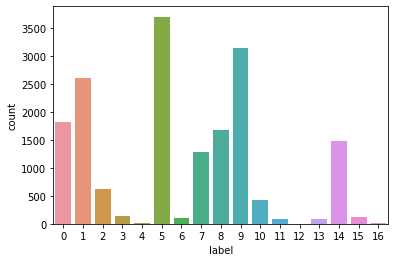

In [6]:
sns.countplot(df['label'])
#sns.distplot( df['label'])

In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
count,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,17337.000000,1.733700e+04,17337.000000
mean,-1.311494e-17,6.557469e-18,1.639367e-17,1.803304e-17,-4.344323e-17,-3.114798e-17,-1.639367e-18,4.918102e-17,-1.229525e-17,1.352478e-17,4.067680e-17,-1.639367e-18,-2.049209e-19,1.803304e-17,-2.172162e-17,-1.557399e-17,-2.459051e-18,2.622988e-17,-1.690597e-17,2.172162e-17,8.196836e-18,-2.003102e-17,-1.844288e-18,1.311494e-17,8.606678e-18,1.643466e-16,-2.858647e-17,-2.418067e-17,8.196836e-19,1.229525e-17,1.045097e-16,2.377082e-17,-2.079947e-17,-1.659859e-17,-3.483655e-18,2.356590e-18,1.127065e-17,4.528752e-17,2.541019e-17,-2.459051e-17,4.016450e-17,-2.008225e-17,1.065589e-17,-3.811529e-17,2.131177e-17,-4.467276e-17,-6.045167e-18,1.147557e-17,-2.377082e-17,-7.172232e-18,3.278734e-17,-4.877117e-17,1.024605e-16,-8.196836e-18,-4.098418e-18,3.524640e-17,-6.659929e-18,2.377082e-17,1.926256e-17,9.426361e-18,1.225427e-16,-2.700857e-16,-9.569806e-17,-1.475430e-17,5.286959e-17,5.245975e-17,-7.582073e-18,2.049209e-17,-5.164007e-17,5.409912e-17,-4.938594e-17,5.327943e-17,-6.803374e-17,-1.598383e-17,-5.286959e-17,3.073814e-17,1.475430e-17,1.639367e-17,4.590228e-17,-1.065589e-17,1.639367e-17,-9.057504e-17,6.557469e-17,1.885272e-17,2.622988e-17,-6.434516e-17,-1.393462e-16,-1.270510e-17,-1.557399e-17,1.803304e-17,-3.442671e-17,-2.582003e-17,3.114798e-17,-4.397603e-16,-1.762320e-17,7.377152e-18,-1.008211e-16,-4.098418e-17,-3.852513e-17,4.590228e-17,6.393532e-17,7.049279e-17,-5.819754e-17,5.655817e-17,4.590228e-17,1.639367e-17,-3.422179e-17,-7.336168e-17,4.098418e-17,5.082038e-17,1.393462e-17,4.836133e-17,9.016520e-18,-8.893567e-17,3.278734e-18,1.155754e-16,-6.065659e-17,3.832021e-17,6.967311e-18,2.254130e-17,1.721336e-17,6.434516e-17,-2.459051e-17,1.844288e-17,2.090193e-17,4.815641e-17,7.377152e-18,1.844288e-17,2.090193e-17,-4.098418e-19,-2.541019e-17,2.663972e-18,0.000000,-6.106643e-17,5.9

In [14]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

### FEATURE SELECTION 

#### 1) Pearson f_regression 

In [7]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [73]:
best_features = SelectKBest(score_func = f_regression, k=50 )
fit = best_features.fit(X_train,y_train)

In [74]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
72,4471.935782,72
113,3711.263369,113
97,3296.153460,97
65,3294.267784,65
76,2968.695596,76
...,...,...
47,0.526222,47
132,0.440958,132
4,0.115269,4
122,0.074480,122


In [75]:
final_features =featurescore.nlargest(50,'scores')

In [76]:
final_features['specs'].to_numpy()

array(['72', '113', '97', '65', '76', '85', '100', '96', '71', '86', '68',
       '2', '37', '94', '98', '78', '58', '30', '23', '57', '79', '70',
       '55', '59', '63', '84', '126', '56', '33', '41', '89', '67', '3',
       '121', '116', '112', '105', '26', '40', '91', '108', '66', '82',
       '5', '73', '93', '18', '11', '32', '29'], dtype=object)

In [132]:
New_features_df =df[['72', '113', '97', '65', '76', '85', '100', '96', '71', '86', '68',
       '2', '37', '94', '98', '78', '58', '30', '23', '57', '79', '70',
       '55', '59', '63', '84', '126', '56', '33', '41', '89', '67', '3',
       '121', '116', '112', '105', '26', '40', '91', '108', '66', '82',
       '5', '73', '93', '18', '11', '32', '29','label']]

In [77]:
x_pearson  = New_features_df.drop(['label'], axis=1)
y_pearson = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_pearson, y_pearson, test_size=0.2,random_state=22)

### 2) ANNOVA f_classif

In [79]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [80]:
best_features = SelectKBest(score_func = f_classif, k=50 )
fit = best_features.fit(X_train,y_train)

In [81]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
113,1371.229159,113
72,939.515671,72
96,789.305416,96
70,767.753704,70
85,761.909464,85
...,...,...
10,30.562648,10
122,30.351232,122
128,26.242245,128
124,16.095496,124


In [82]:
final_features =featurescore.nlargest(50,'scores')

In [83]:
final_features['specs'].to_numpy()

array(['113', '72', '96', '70', '85', '71', '65', '91', '76', '97', '109',
       '100', '121', '58', '57', '55', '111', '95', '116', '126', '103',
       '80', '86', '89', '67', '94', '59', '105', '82', '8', '73', '26',
       '56', '106', '125', '112', '107', '127', '61', '38', '62', '68',
       '7', '19', '33', '79', '2', '60', '98', '130'], dtype=object)

In [84]:
New_features_df =df[['113', '72', '96', '70', '85', '71', '65', '91', '76', '97', '109',
       '100', '121', '58', '57', '55', '111', '95', '116', '126', '103',
       '80', '86', '89', '67', '94', '59', '105', '82', '8', '73', '26',
       '56', '106', '125', '112', '107', '127', '61', '38', '62', '68',
       '7', '19', '33', '79', '2', '60', '98', '130','label']]

In [85]:
x_anova  = New_features_df.drop(['label'], axis=1)
y_anova = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_anova, y_anova, test_size=0.2,random_state=22)

### 3) CHI SQUARE chi2

In [87]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [88]:
Mn = MinMaxScaler()
x_train_mn = Mn.fit_transform(x_train)
x_test_mn = Mn.transform(x_test)
best_features = SelectKBest(score_func = chi2, k=50 )
fit = best_features.fit(x_train_mn,y_train)

In [89]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
113,7022.327938,113
121,4344.907236,121
116,3369.569641,116
120,1714.458997,120
72,1533.221464,72
...,...,...
15,18.597613,15
3,18.460158,3
35,17.603515,35
10,13.763568,10


In [90]:
final_features =featurescore.nlargest(50,'scores')

In [91]:
final_features['specs'].to_numpy()

array(['113', '121', '116', '120', '72', '85', '96', '130', '70', '97',
       '82', '89', '65', '109', '100', '71', '91', '58', '106', '117',
       '80', '112', '57', '103', '59', '55', '107', '115', '93', '126',
       '94', '56', '119', '131', '62', '86', '95', '84', '114', '122',
       '61', '92', '60', '104', '66', '68', '123', '73', '52', '74'],
      dtype=object)

In [92]:
New_features_df =df[['113', '121', '116', '120', '72', '85', '96', '130', '70', '97',
       '82', '89', '65', '109', '100', '71', '91', '58', '106', '117',
       '80', '112', '57', '103', '59', '55', '107', '115', '93', '126',
       '94', '56', '119', '131', '62', '86', '95', '84', '114', '122',
       '61', '92', '60', '104', '66', '68', '123', '73', '52', '74','label']]

In [93]:
x_chi2  = New_features_df.drop(['label'], axis=1)
y_chi2 = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_chi2, y_chi2, test_size=0.2,random_state=22)

### 4) MUTUAL INFORMATION mutual_info_classif

In [111]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [112]:
best_features = SelectKBest(score_func = mutual_info_classif, k=50 )
fit = best_features.fit(x_train,y_train)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
30,0.965914,30
43,0.953750,43
28,0.950668,28
6,0.949809,6
41,0.948787,41
...,...,...
128,0.011901,128
122,0.011298,122
124,0.010344,124
118,0.010240,118


In [113]:
final_features =featurescore.nlargest(50,'scores')
final_features['specs'].to_numpy()

array(['30', '43', '28', '6', '41', '25', '0', '9', '8', '44', '45', '20',
       '21', '33', '19', '46', '11', '47', '38', '16', '4', '18', '15',
       '26', '1', '24', '22', '5', '3', '2', '12', '32', '49', '31', '48',
       '36', '37', '17', '10', '29', '27', '35', '40', '34', '42', '14',
       '7', '39', '23', '13'], dtype=object)

In [114]:
New_features_df =df[['30', '43', '28', '6', '41', '25', '0', '9', '8', '44', '45', '20',
       '21', '33', '19', '46', '11', '47', '38', '16', '4', '18', '15',
       '26', '1', '24', '22', '5', '3', '2', '12', '32', '49', '31', '48',
       '36', '37', '17', '10', '29', '27', '35', '40', '34', '42', '14',
       '7', '39', '23', '13','label']]

In [115]:
x_Mut_info  = New_features_df.drop(['label'], axis=1)
y_Mut_info = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_Mut_info, y_Mut_info, test_size=0.2,random_state=22)

### 5) PCA

In [119]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [11]:
sc = StandardScaler()
x = sc.fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf, y], axis = 1)

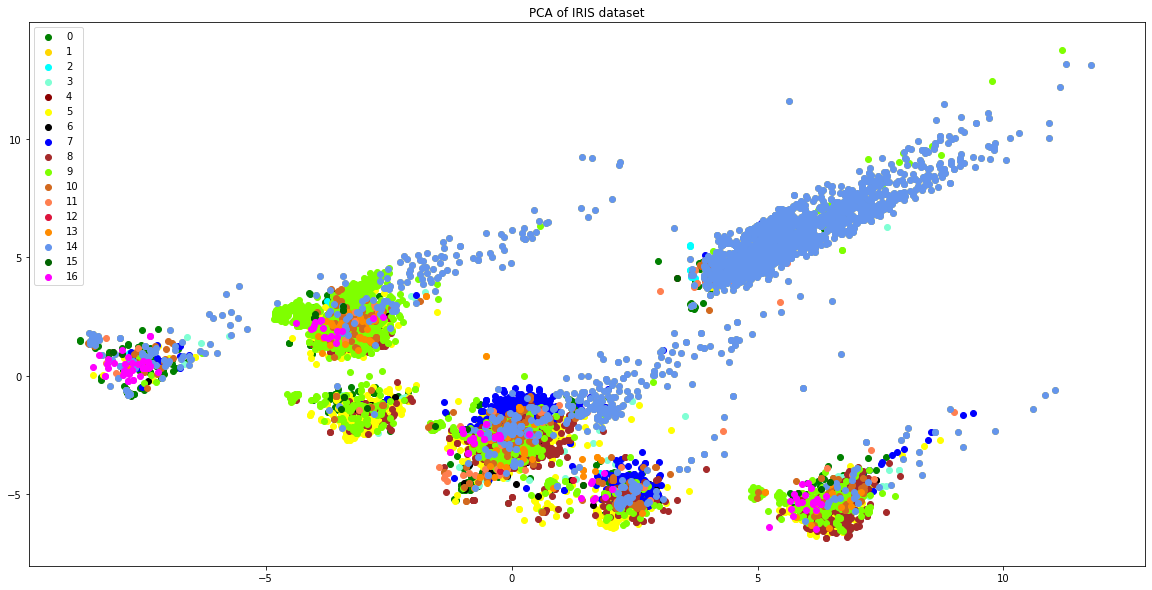

In [300]:
pl.figure(figsize = (20,10))

for c, i, target in zip(['green','gold','aqua', 'aquamarine','darkred','yellow','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'], [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,1,4,15,16], targets):
    pl.scatter(principalComponents[y==i,0], principalComponents[y==i,1], c=c, label=target)
pl.legend()
pl.title('PCA of IRIS dataset')

pl.show()

In [120]:
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
x_train_pca.shape

(13869, 53)

In [121]:
LogisiticRegression = LogisticRegression(multi_class='ovr',solver = 'newton-cg', penalty='l2',C=100)
LogisiticRegression.fit(x_train_pca, y_train)
y_pred = LogisiticRegression.predict(x_test_pca)
print("accuracy of Logistic funtion:{}".format(accuracy_score(y_test,y_pred)))

accuracy of Logistic funtion:0.7577854671280276


#### Here after taking 95% of variance under consideration we are getting 75.77% of accuracy with 53 number of features

In [305]:
pca = PCA(0.90)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
x_train_pca.shape

(13869, 42)

In [306]:
LogisiticRegression = LogisticRegression(multi_class='ovr',solver = 'newton-cg', penalty='l2',C=100)
LogisiticRegression.fit(x_train_pca, y_train)
y_pred = LogisiticRegression.predict(x_test_pca)
print("accuracy of Logistic funtion:{}".format(accuracy_score(y_test,y_pred)))

accuracy of Logistic funtion:0.75


#### Here after taking 90% of variance under consideration we are getting 75.00% of accuracy with 42 number of features

In [307]:
pca = PCA(0.85)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
x_train_pca.shape

(13869, 33)

In [308]:
LogisiticRegression = LogisticRegression(multi_class='ovr',solver = 'newton-cg', penalty='l2',C=100)
LogisiticRegression.fit(x_train_pca, y_train)
y_pred = LogisiticRegression.predict(x_test_pca)
print("accuracy of Logistic funtion:{}".format(accuracy_score(y_test,y_pred)))

accuracy of Logistic funtion:0.7445213379469435


#### Here after taking 85% of variance under consideration we are getting 74.45% of accuracy with 33 number of features

In [310]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.32128291e-01, 1.04875325e-01, 7.51232674e-02, 5.73349133e-02,
       5.26592234e-02, 4.65190436e-02, 3.58838230e-02, 3.34208031e-02,
       2.79365566e-02, 2.45964482e-02, 2.00004316e-02, 1.85796724e-02,
       1.80973257e-02, 1.70208367e-02, 1.53100185e-02, 1.47896163e-02,
       1.33592343e-02, 1.28002137e-02, 1.19542767e-02, 1.12247618e-02,
       1.06629409e-02, 1.03336683e-02, 9.51745025e-03, 9.31357067e-03,
       8.73221423e-03, 8.52781189e-03, 8.23130038e-03, 8.00124677e-03,
       7.59202645e-03, 7.32012229e-03, 7.09700983e-03, 6.84389071e-03,
       6.80756078e-03, 6.40512073e-03, 6.12785759e-03, 5.91241826e-03,
       5.83335065e-03, 5.75266770e-03, 5.45363672e-03, 5.42288939e-03,
       5.06322523e-03, 5.00543342e-03, 4.84801038e-03, 4.71674060e-03,
       4.50606534e-03, 4.42784800e-03, 4.37909960e-03, 4.21308604e-03,
       4.10334778e-03, 4.05043429e-03, 3.92132134e-03, 3.77958623e-03,
       3.62511236e-03, 3.37542379e-03, 3.33931454e-03, 3.22132023e-03,
      

### 6) EXTRA TREE CLASSIFIER for feature selection

In [131]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [132]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [129]:
print(model.feature_importances_)

[8.70199547e-03 6.06970470e-03 1.09752612e-02 5.79458129e-03
 7.07849447e-03 6.43212779e-03 6.63674103e-03 7.97947620e-03
 9.95586764e-03 8.31688228e-03 6.16109575e-03 8.00766236e-03
 7.76514624e-03 5.97462373e-03 6.60536225e-03 6.74023797e-03
 9.79180816e-03 7.70780716e-03 1.06367731e-02 7.61755116e-03
 6.76365449e-03 7.36399707e-03 7.05091213e-03 7.21257694e-03
 9.70151041e-03 9.23845680e-03 1.04177522e-02 6.45256385e-03
 8.53171972e-03 7.56779571e-03 1.46889633e-02 9.24849291e-03
 5.45143256e-03 1.18444711e-02 5.91114333e-03 5.51299937e-03
 6.43751921e-03 7.78135475e-03 9.96683944e-03 6.82288067e-03
 1.10103330e-02 7.50283204e-03 6.91296612e-03 9.57032038e-03
 6.43391797e-03 9.48730413e-03 7.11120607e-03 8.32333545e-03
 5.93668361e-03 6.72649593e-03 1.86007955e-02 2.80732633e-03
 1.75133718e-02 1.59319948e-02 1.42833513e-02 2.22197546e-02
 7.72920929e-03 1.70393777e-02 1.87299108e-02 8.39576427e-03
 2.50722979e-02 2.55313075e-02 2.78781262e-02 4.29494452e-03
 2.58493110e-03 2.954135

In [133]:
#feat_importance = pd.series(model.feature_importances_, index=x.columns)

dfscore= pd.DataFrame(model.feature_importances_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']


In [134]:
final_features = featurescore.nlargest(50,'scores')
final_features['specs'].to_numpy()

array(['132', '127', '62', '61', '60', '126', '55', '50', '57', '58',
       '53', '52', '125', '113', '54', '30', '38', '8', '120', '130',
       '40', '33', '18', '43', '2', '22', '0', '24', '91', '129', '133',
       '16', '72', '25', '47', '59', '45', '56', '28', '31', '11', '20',
       '26', '7', '49', '4', '37', '96', '131', '29'], dtype=object)

In [135]:
New_features_df =df[['132', '127', '62', '61', '60', '126', '55', '50', '57', '58',
       '53', '52', '125', '113', '54', '30', '38', '8', '120', '130',
       '40', '33', '18', '43', '2', '22', '0', '24', '91', '129', '133',
       '16', '72', '25', '47', '59', '45', '56', '28', '31', '11', '20',
       '26', '7', '49', '4', '37', '96', '131', '29','label']]

In [136]:
x_extra_tree  = New_features_df.drop(['label'], axis=1)
y_extra_tree = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_extra_tree, y_extra_tree, test_size=0.2,random_state=22)

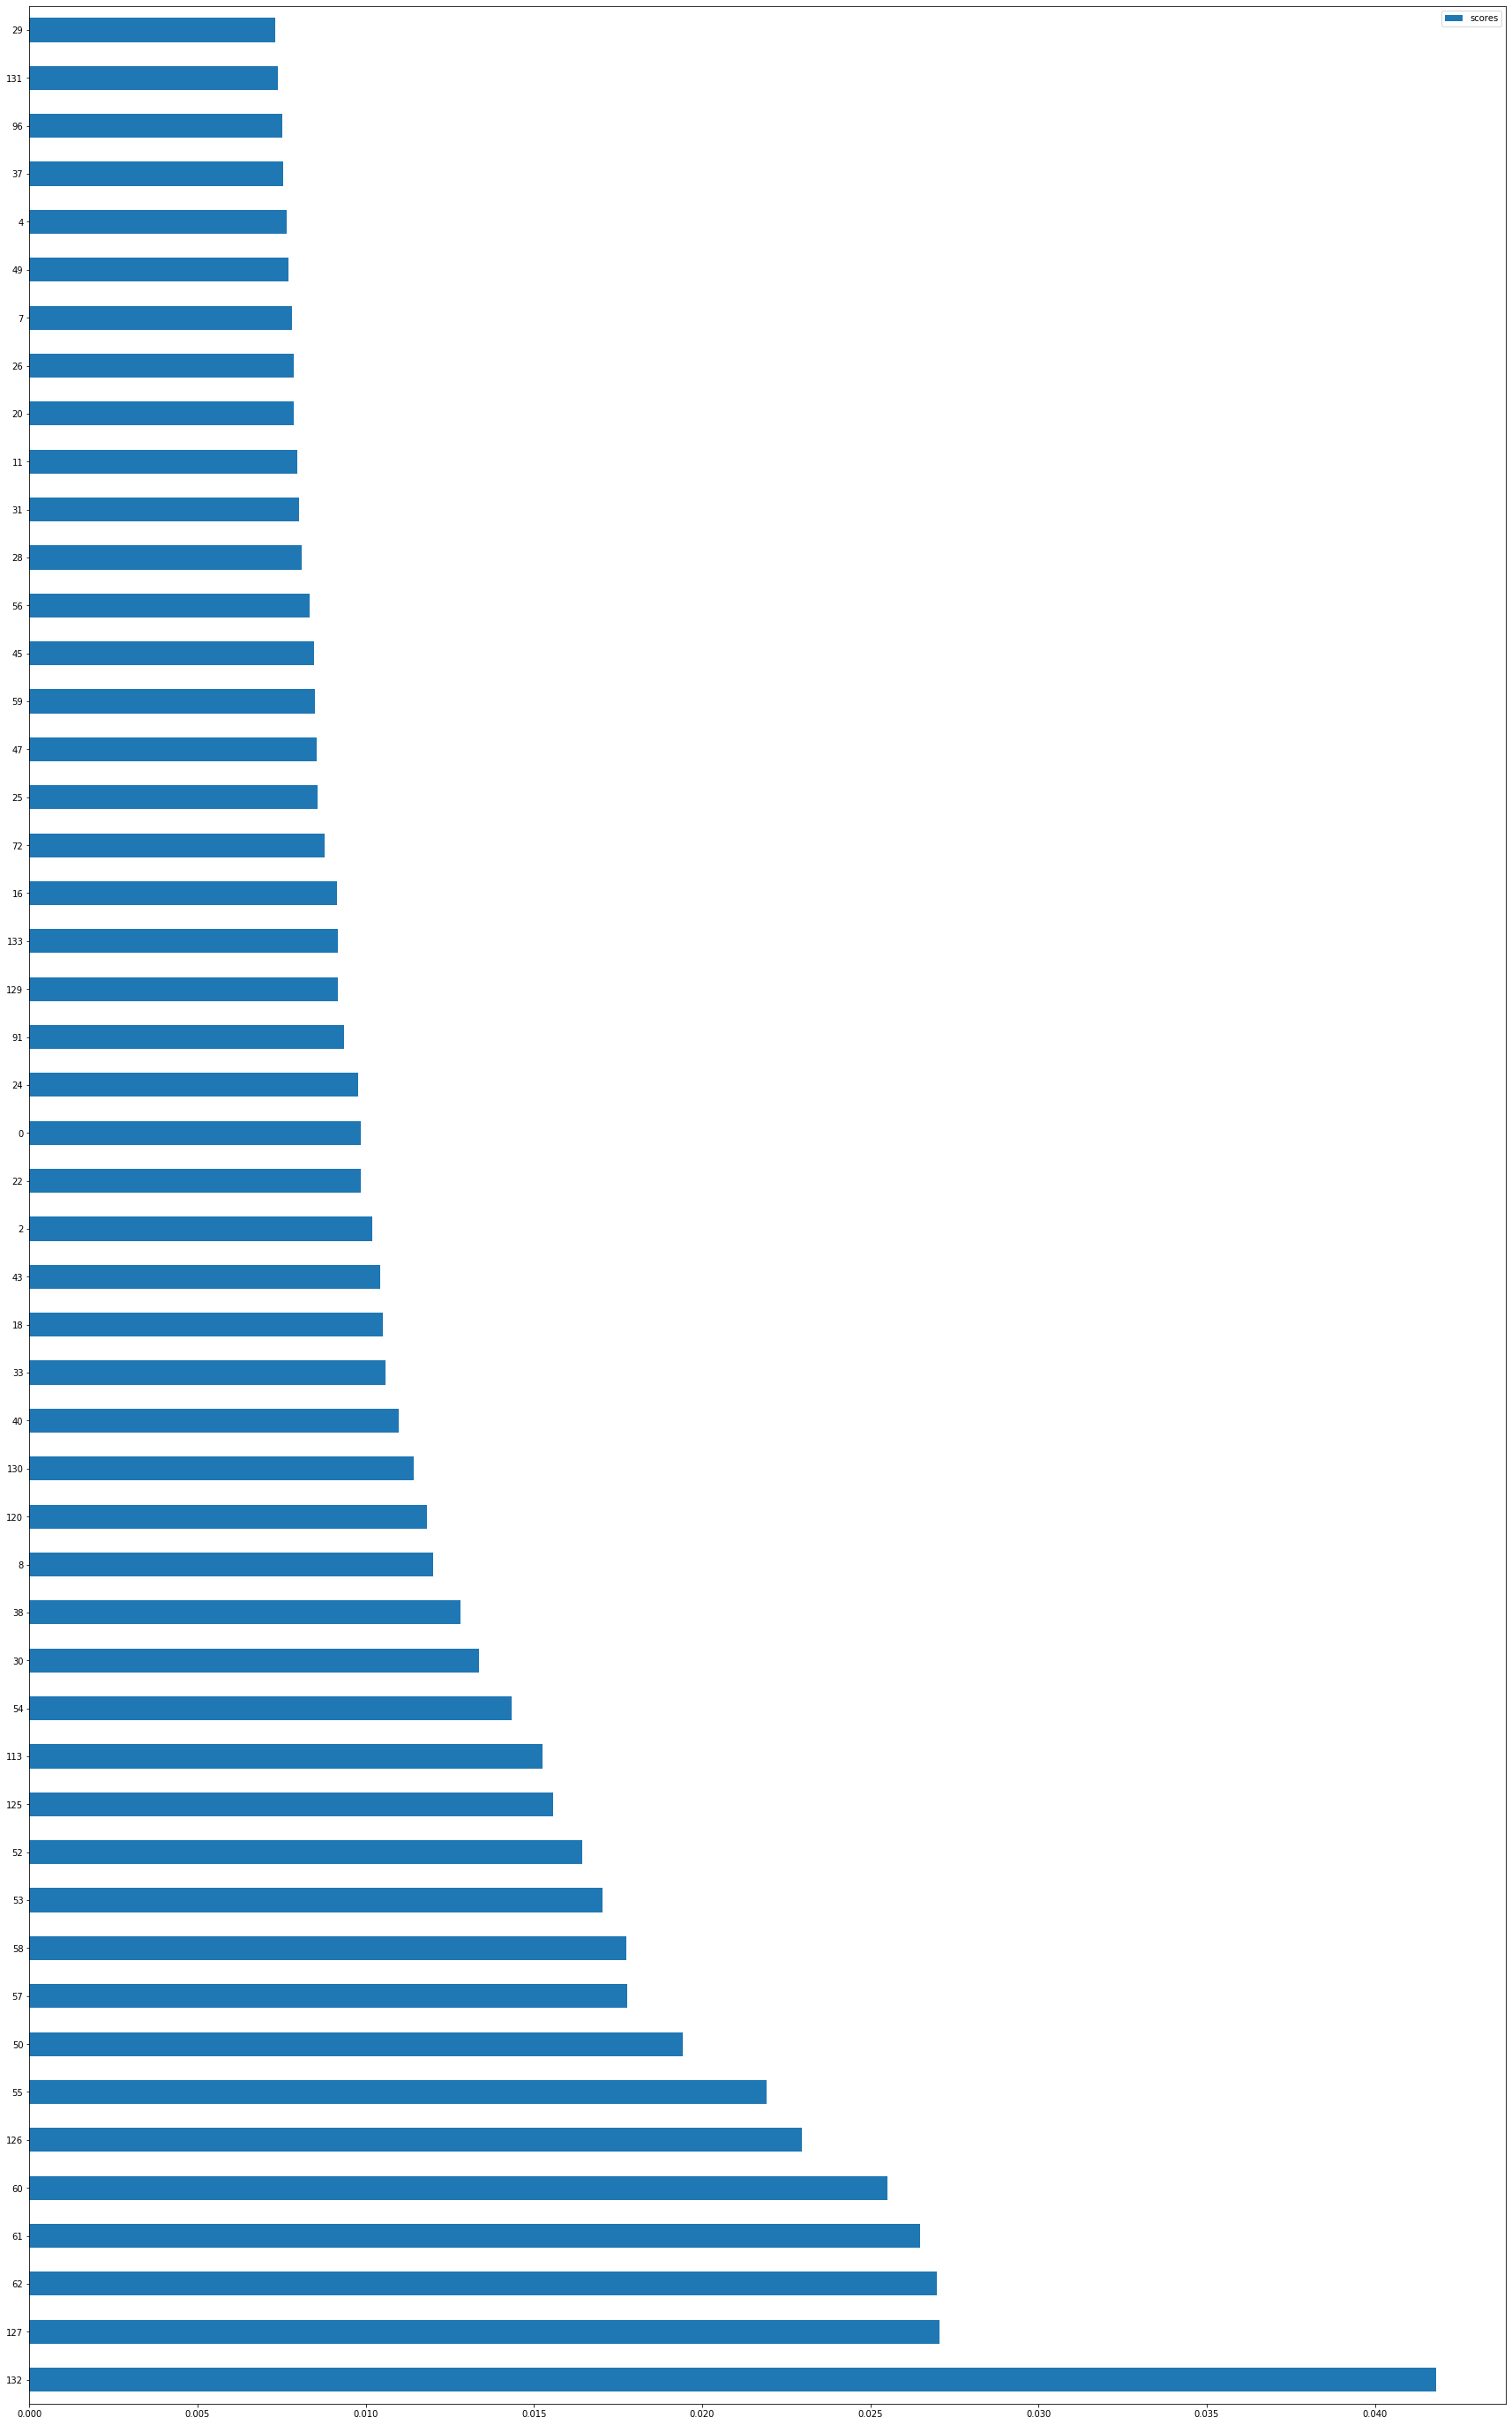

In [137]:
#featurescore = featurescore.set_index('specs')
featurescore.nlargest(50,'scores').plot(kind='barh', figsize=(30,50))
plt.show()

### 7) XG_BOOST for feature selection

In [66]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [67]:

for col in df.columns:
    lb=LabelEncoder()
    lb.fit(df[col])
    df[col]=lb.transform(df[col])
    
x_train=df.drop(['label',],axis=1)
y_train=df['label']

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=100)

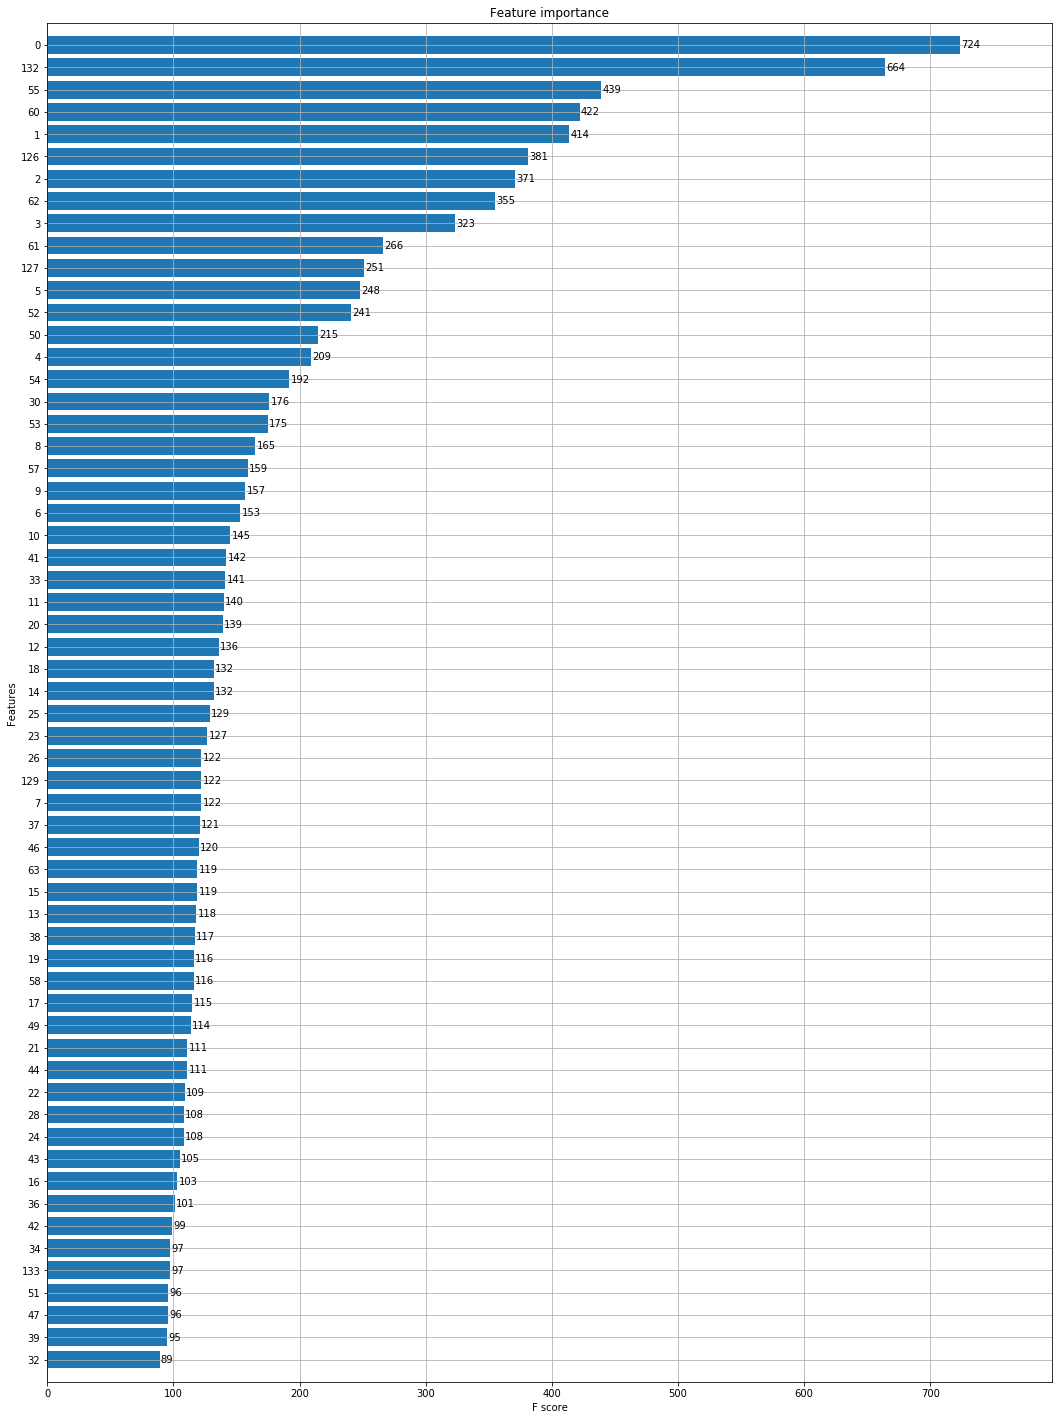

In [68]:
fig, ax = plt.subplots(figsize=(18,25))
xgb.plot_importance(model, height=0.8, ax=ax, max_num_features=60)
plt.show()

In [69]:
New_features_df =df[['0', '132', '55', '60', '1', '126', '2', '62', '3', '61',
       '127', '5', '52', '50', '4', '54', '30', '53', '8', '57',
       '9', '6', '10', '41', '33', '11', '20', '12', '18', '14', '25',
       '23', '26', '129', '7', '37', '46', '63', '15', '13', '38', '19', '58',
       '17', '49', '21', '44', '22', '28', '24','label']]

In [70]:
x_XG_BOOST  = New_features_df.drop(['label'], axis=1)
y_XG_BOOST = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_XG_BOOST, y_XG_BOOST, test_size=0.2,random_state=22)

### 8) Recursive Feature Selection RFE

In [158]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']
print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=22)

rows:17337  columns :135


In [159]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 50)
fit = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 50
Selected Features: [False  True False False False False False False False  True  True False
  True  True False  True  True False False False  True  True False False
  True  True False False  True False  True  True False False False False
 False False False  True  True  True False False False False  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False  True  True False False False False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False  True False  True  True False False False False False
  True False False  True False  True  True  True False  True  True  True
  True  True]
Feature Ranking: [36  1 17 25 34 31 18 15 24  1  1 22  1  1 28  1  1  7 21  8  1  1 20 12
  1  1 16  9  1 13  1  1 37 26  3  6 11 23 19  1  1  1 35

In [160]:
f1 =[]
for i in range(x_train.shape[1]):
    if fit.support_[i]==True:
        f1.append(i)
        print('Column: %d, Selected %s, Rank: %.3f' % (i, fit.support_[i], fit.ranking_[i]))
        print(f1)

Column: 1, Selected True, Rank: 1.000
[1]
Column: 9, Selected True, Rank: 1.000
[1, 9]
Column: 10, Selected True, Rank: 1.000
[1, 9, 10]
Column: 12, Selected True, Rank: 1.000
[1, 9, 10, 12]
Column: 13, Selected True, Rank: 1.000
[1, 9, 10, 12, 13]
Column: 15, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15]
Column: 16, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16]
Column: 20, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20]
Column: 21, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21]
Column: 24, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21, 24]
Column: 25, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21, 24, 25]
Column: 28, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21, 24, 25, 28]
Column: 30, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21, 24, 25, 28, 30]
Column: 31, Selected True, Rank: 1.000
[1, 9, 10, 12, 13, 15, 16, 20, 21, 24, 25, 28, 30, 31]
Column: 39, Selected True, Rank: 1.000
[1, 9, 10,

In [151]:
New_features_df =df[[ '1', '9', '10', '12', '13', '15', '16', '20', '21', '24', '25', '28', '30', '31', '39', '40', '41', '46', '47', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '73', '74', '81', '85', '103', '111', '113', '114', '120', '123', '125', '126', '127', '129', '130', '131', '132', '133','label']]

In [152]:
x_RFE  = New_features_df.drop(['label'], axis=1)
y_RFE = New_features_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_RFE, y_RFE, test_size=0.2,random_state=22)

### MACHINE LEARNING MODELLING 

### 1) Logistic Regression for multi class classification

In [381]:
LogisiticRegression = LogisticRegression(multi_class='ovr',solver = 'newton-cg', penalty='l2',C=100)
LogisiticRegression.fit(x_train_pca, y_train)
y_pred = LogisiticRegression.predict(x_test_pca)
print("accuracy of Logistic funtion:{}".format(accuracy_score(y_test,y_pred)))

accuracy of Logistic funtion:0.7445213379469435


In [31]:
#y_pred = classifier_logistic.predict(X_test)
#accuracy_score(y_test,y_pred) 

print(classification_report(y_test,y_pred,digits=17))

                   precision    recall  f1-score   support

                0  0.77445652173913049 0.74412532637075723 0.75898801597869514       383
                1  0.89299610894941639 0.85474860335195535 0.87345385347288307       537
                2  0.86428571428571432 0.99180327868852458 0.92366412213740456       122
                3  0.59999999999999998 0.18750000000000000 0.28571428571428570        32
                4  0.00000000000000000 0.00000000000000000 0.00000000000000000         2
                5  0.79753086419753083 0.86827956989247312 0.83140283140283133       744
                6  1.00000000000000000 0.04545454545454546 0.08695652173913045        22
                7  0.69745222929936301 0.86561264822134387 0.77248677248677233       253
                8  0.71835443037974689 0.72990353697749200 0.72408293460925044       311
                9  0.73834586466165408 0.77567140600315954 0.75654853620955309       633
               10  0.44000000000000000 0.137500000

In [110]:
x  = df.drop(['label'], axis=1)
y = df['label']
y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
n_classes = y_roc.shape[1]
#print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(x, y_roc, test_size=0.2,random_state=22)



In [109]:
classifier_logistic = OneVsRestClassifier(LogisticRegression(solver = 'newton-cg', penalty='l2',C=100, 
                                 random_state=22))
y_score = classifier_logistic.fit(X_train, y_train).decision_function(X_test)

In [111]:
#y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#n_classes = y_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

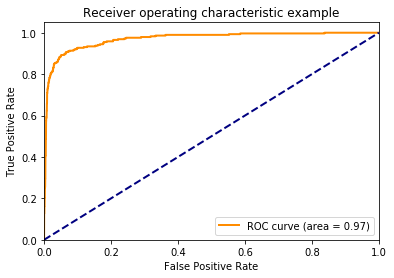

In [112]:
plt.figure()
lw = 2
plt.plot(fpr[14], tpr[14], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[14])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

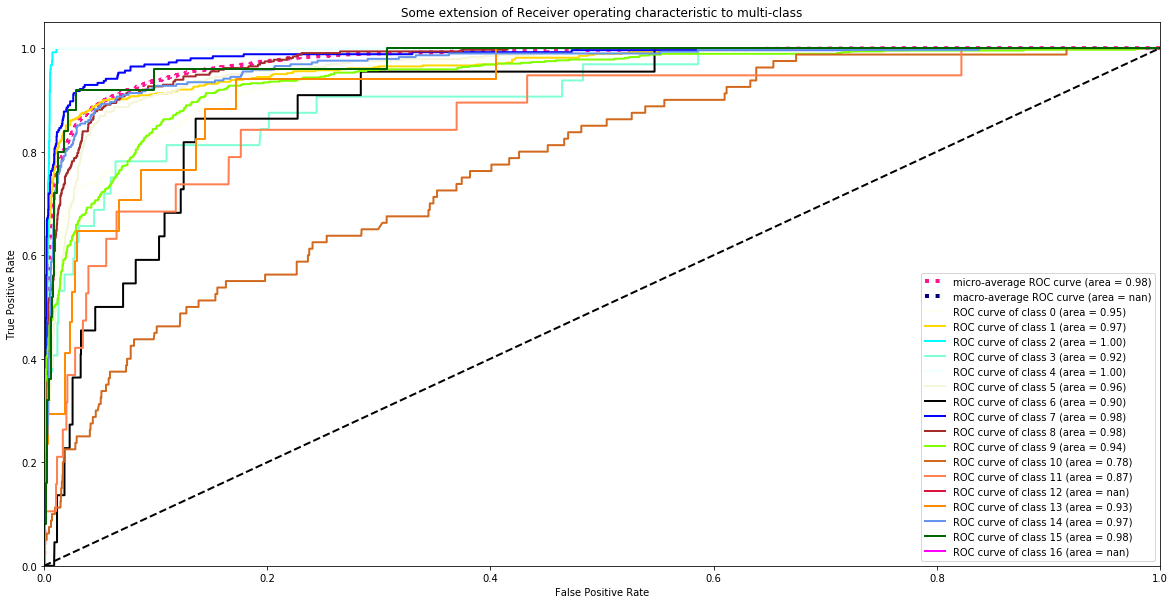

In [113]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['ivory','gold','aqua', 'aquamarine','azure','beige','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()


In [ ]:
y_prob = classifier_logistic.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class='ovo',average="macro")
#weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="weighted")
#macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr',average="macro")
#weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="weighted")

#print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
#print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


### 2) KKN Classifier for MultiClass Classification

In [441]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)



0.777681660899654

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, y_pred)

In [401]:
print(classification_report(y_test,y_pred,digits=17))

                   precision    recall  f1-score   support

                0  0.75871313672922247 0.73890339425587470 0.74867724867724872       383
                1  0.90838206627680307 0.86778398510242083 0.88761904761904764       537
                2  0.84671532846715325 0.95081967213114749 0.89575289575289563       122
                3  0.41176470588235292 0.21875000000000000 0.28571428571428570        32
                4  0.00000000000000000 0.00000000000000000 0.00000000000000000         2
                5  0.84375000000000000 0.83467741935483875 0.83918918918918928       744
                6  0.33333333333333331 0.04545454545454546 0.08000000000000000        22
                7  0.75618374558303891 0.84584980237154150 0.79850746268656714       253
                8  0.68882175226586106 0.73311897106109325 0.71028037383177567       311
                9  0.75303030303030305 0.78515007898894151 0.76875483372003084       633
               10  0.21621621621621623 0.200000000

In [431]:
x  = df.drop(['label'], axis=1)
y = df['label']
y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
n_classes = y_roc.shape[1]
#print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(x, y_roc, test_size=0.2,random_state=22)



In [432]:
y_score = knn.fit(X_train, y_train).predict_proba(X_test)

In [410]:
#y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#n_classes = y_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [409]:
y_test.shape

(3468, 17)

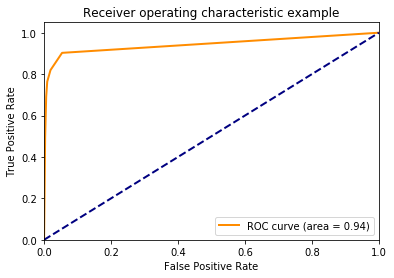

In [412]:
plt.figure()
lw = 2
plt.plot(fpr[14], tpr[14], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[14])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

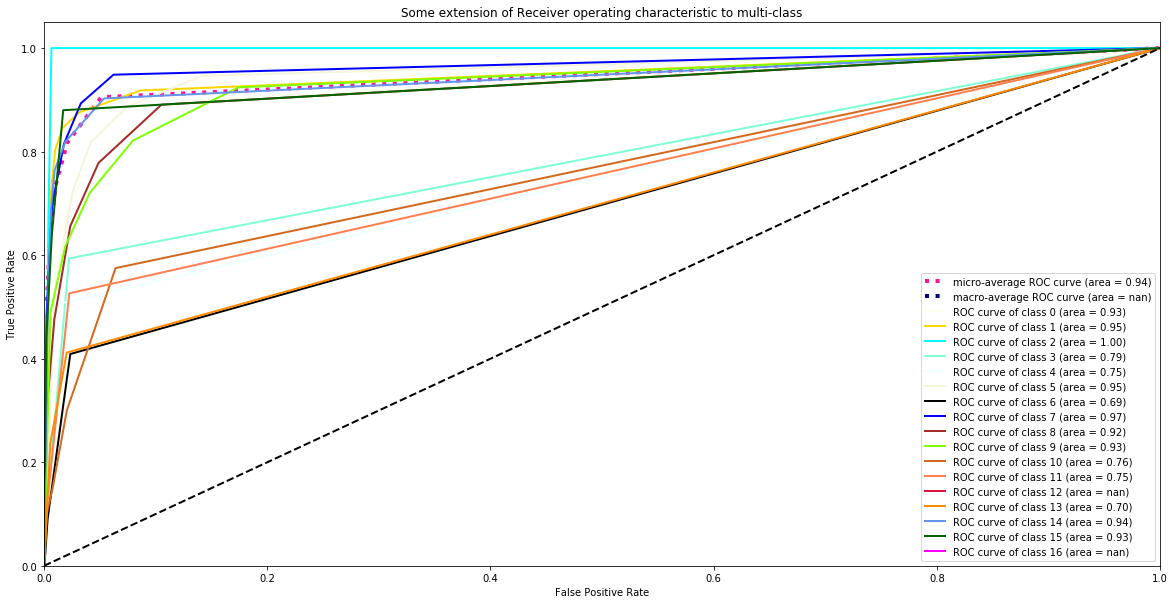

In [413]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['ivory','gold','aqua', 'aquamarine','azure','beige','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()


In [ ]:
#y_prob = classifier_logistic.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, average="macro")
#weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="weighted")
#macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr',average="macro")
#weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="weighted")

#print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
#print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


### 3) Naive Bayes Classifier for Multi class classification

In [453]:
Mn = MinMaxScaler()
X_train_Mn = sc.fit_transform(x_train)
X_test_Mn = sc.transform(x_test)

model = GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy_score(y_test,pred)


0.46482122260668973

#### Since Naive Bayes is giving very less accuracy we skiped the remaining part

### 4) SUPPORT VECTOR MACHINE for multi class classification

In [182]:
#SVC()

clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)  

0.8143021914648212

In [482]:
print(classification_report(y_test,y_pred,digits=17))

                   precision    recall  f1-score   support

                0  0.68364611260053620 0.66579634464751958 0.67460317460317465       383
                1  0.86372360844529750 0.83798882681564246 0.85066162570888471       537
                2  0.84892086330935257 0.96721311475409832 0.90421455938697315       122
                3  0.10526315789473684 0.06250000000000000 0.07843137254901961        32
                4  0.50000000000000000 1.00000000000000000 0.66666666666666663         2
                5  0.81863979848866497 0.87365591397849462 0.84525357607282181       744
                6  0.00000000000000000 0.00000000000000000 0.00000000000000000        22
                7  0.73999999999999999 0.87747035573122534 0.80289330922242308       253
                8  0.73333333333333328 0.81350482315112538 0.77134146341463417       311
                9  0.75239616613418525 0.74407582938388628 0.74821286735504366       633
               10  0.08695652173913043 0.025000000

In [185]:
print("accuracy :{}".format(accuracy_score(y_test, y_pred)))
print("f1 score :{}".format(f1_score(y_test, y_pred,average='weighted')))
cm = confusion_matrix(y_test,y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("recall : {}".format(np.mean(recall)))
print("Precision : {}".format(np.mean(precision)))

accuracy :0.8143021914648212
f1 score :0.802546488325949
recall : 0.596501132626907
Precision : 0.7381158186283022


In [493]:
x  = df.drop(['label'], axis=1)
y = df['label']
y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
n_classes = y.shape[1]
#print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)



In [508]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=22))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [509]:
#y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#n_classes = y_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

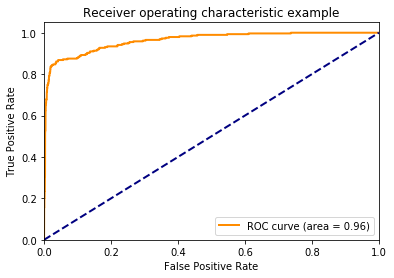

In [510]:
plt.figure()
lw = 2
plt.plot(fpr[14], tpr[14], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[14])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

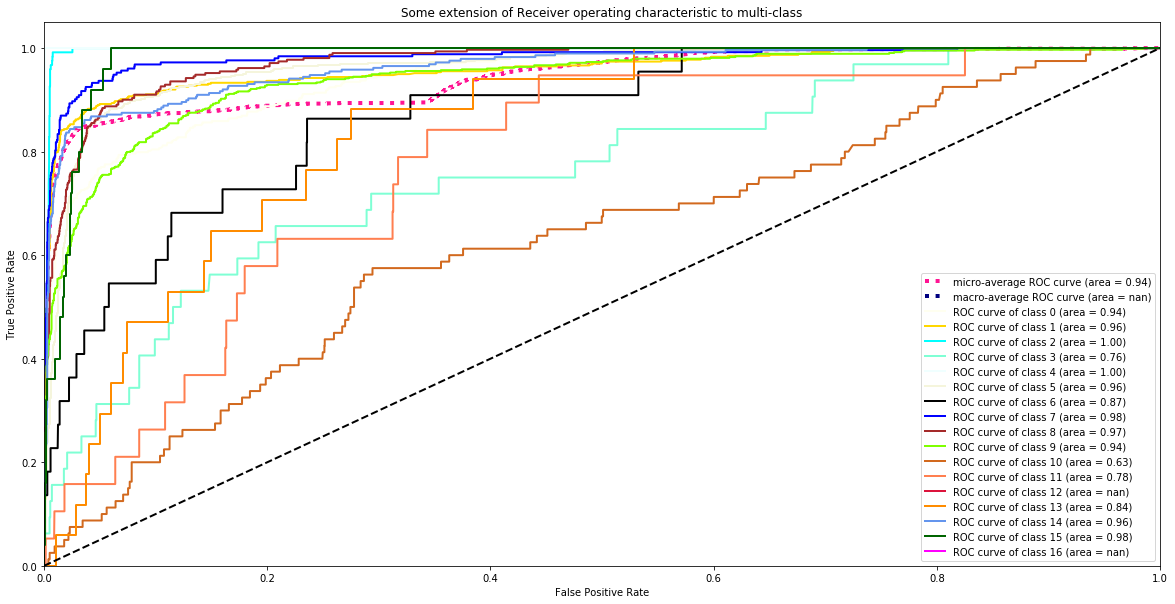

In [511]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['ivory','gold','aqua', 'aquamarine','azure','beige','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()


In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

### 5) XGBOOST for Multi Class Classification

In [10]:
#sc = StandardScaler()
#X_train_std = sc.fit_transform(x_train)
#X_test_std = sc.transform(x_test)
xgb_model = OneVsRestClassifier(xgb.XGBClassifier( ) )
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
print("Accuracy :{}".format(accuracy_score(y_test,y_pred)))

Accuracy :0.8235294117647058


In [171]:
print("f1 score :{}".format(f1_score(y_test, y_pred,average='weighted')))


f1 score :0.8120259766220636


In [181]:
cm = confusion_matrix(y_test,y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("recall : {}".format(np.mean(recall)))
print("Precision : {}".format(np.mean(precision)))

recall : 0.6028007203128699
Precision : 0.7405775209670405


In [479]:
print(classification_report(y_test,y_pred,digits=17))

                   precision    recall  f1-score   support

                0  0.78906250000000000 0.79112271540469969 0.79009126466753588       383
                1  0.89714285714285713 0.87709497206703912 0.88700564971751417       537
                2  0.85815602836879434 0.99180327868852458 0.92015209125475295       122
                3  0.56250000000000000 0.28125000000000000 0.37500000000000000        32
                4  0.66666666666666663 1.00000000000000000 0.80000000000000004         2
                5  0.84004884004884006 0.92473118279569888 0.88035828534868832       744
                6  0.33333333333333331 0.04545454545454546 0.08000000000000000        22
                7  0.81090909090909091 0.88142292490118579 0.84469696969696983       253
                8  0.78769230769230769 0.82315112540192925 0.80503144654088044       311
                9  0.80031446540880502 0.80410742496050558 0.80220646178092991       633
               10  0.44827586206896552 0.162500000

In [ ]:
x  = df.drop(['label'], axis=1)
y = df['label']
y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#mlb = MultiLabelBinarizer()
#y_roc = mlb.fit_transform(y)
n_classes = y_roc.shape[1]
#print("rows:{}  columns :{}".format(df.shape[0],df.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(x, y_roc, test_size=0.2,random_state=22)



In [12]:
classifier = OneVsRestClassifier(xgb.XGBClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [13]:
#y_roc = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#n_classes = y_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

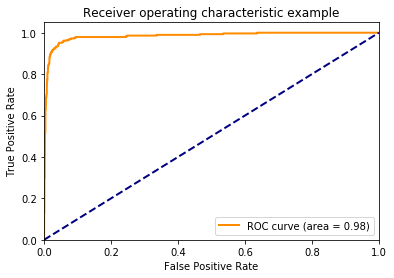

In [14]:
plt.figure()
lw = 2
plt.plot(fpr[14], tpr[14], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[14])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

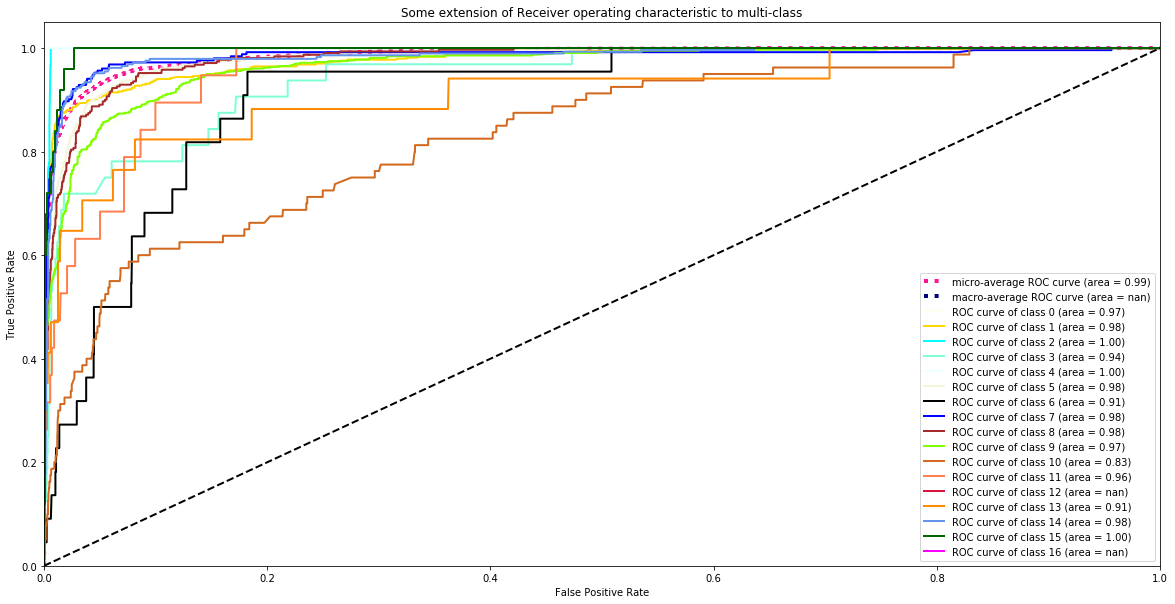

In [15]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['ivory','gold','aqua', 'aquamarine','azure','beige','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()


In [ ]:
#y_prob = classifier_logistic.predict_proba(X_test)

#macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, average="macro")
#weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="weighted")
#macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr',average="macro")
#weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="weighted")

#print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
#print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


#### After trying number of feature selection process on different machine learning algorithm we got maximum results from  RFE feature selection process and XGBOOST on algorithm different performance metrics 

In [161]:
file = open("XGBoost_model.pkl","wb")
pickle.dump(xgb_model_hyper_tune_after,file)

(13869, 134)